In [1]:
import sys
import os
sys.path.insert(0, "../../python")

import numpy as np
from beam.beams import laserbeam
from beam.elements import thickoptic
from beam import interactions
from lens import profile
from lens import bessel
from lens import ray
import matplotlib.pyplot as plt

path = '/media/robert/Data_Storage/Data/Diagnostic/Phase_Diagnostic/GRIN/'
lam = 0.6328

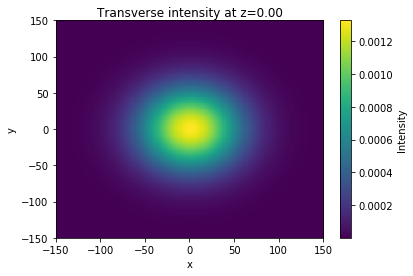

In [2]:
# Lets first just test a grin lens to make sure everything is working
# (I haven't actually tested this code before...)
N = 2**8
Nz = 100
beamParams = {
    'Nx' : N,
    'Ny' : N,
    'X' : 300,
    'Y' : 300,
    'lam' : lam,
    'path' : path,
    'name' : 'HeNe',
    'load' : False,
    'threads' : 4,
    'cyl' : False,
    'E0' : 1,
    'waist' : 80,
    'z0' : 0
}
beam = laserbeam.GaussianLaser(beamParams)
beam.plot_current_intensity()

indexParams = {
    'Nx' : N,
    'Ny' : N,
    'Nz' : Nz,
    'X' : 300,
    'Y' : 300,
    'Z' : 4e3,
    'path' : path,
    'name' : 'GRIN',
    'lam' : lam,
    'load' : False,
}
grin = thickoptic.Index(indexParams)
n0 = 1.5834
k = 1.4929e-7
nih = -n0*(k/2)*(np.reshape(grin.x**2, (N, 1, 1))+np.reshape(grin.y**2, (1, N, 1)))*np.ones((1, 1, Nz))
grin.initialize_index(nih+n0)

In [3]:
interactions.beam_index(beam, grin)
beam.propagate(grin.z, n0)

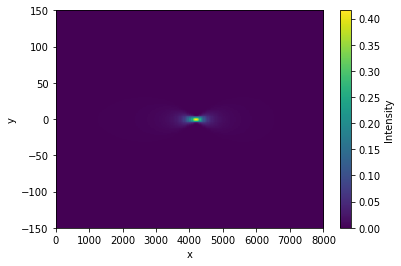

In [4]:
field = np.zeros((N, 2*Nz), dtype='complex')
#I = np.zeros((N, Nz), dtype='double')
for i in range(2*Nz):
    field[:, i] = beam.load_field(i)[0][:, int(N/2+1)]
I = beam.intensity_from_field(field)
plt.imshow(I, aspect='auto', extent=[0, 8e3, -150, 150])
cb = plt.colorbar()
cb.set_label(r'Intensity')
plt.set_cmap('viridis')
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.show()